In [35]:
credentials = {
  "bucket": "reconocimiento2",
  "access_key_id": "ef8a5e72b3f24bc5a8bb10ff6374dd0a",
  "secret_access_key": "a5125ac751b559e4c673e4c998ff39ae4aaa2a3a391e9eaf",
  "endpoint_url": "https://s3.us.cloud-object-storage.appdomain.cloud"
}
credentials2 = {
  "bucket": "donables",
  "access_key_id": "ef8a5e72b3f24bc5a8bb10ff6374dd0a",
  "secret_access_key": "a5125ac751b559e4c673e4c998ff39ae4aaa2a3a391e9eaf",
  "endpoint_url": "https://s3.us.cloud-object-storage.appdomain.cloud"
}

In [3]:
!pip install boto3

In [4]:
!pip install 'h5py<3.0.0'

     |████████████████████████████████| 3.0 MB 1.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [27]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=b1b69511faf4e41c040edec223c9c9086c7b2d7e4e466a7d9ac90a73a4d77f1b
  Stored in directory: /Users/vanessaarellano/Library/Caches/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [5]:
!pip install tensorflow==1.15 ibm-cos-sdk==2.6

  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=13a44024a0e435e85f9876fd9e077eb6610889e21972e07381a54c93445f9393
  Stored in directory: /Users/vanessaarellano/Library/Caches/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0


In [6]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.8.0-py3-none-any.whl (64 kB)
  Using cached tensorflow-2.5.0-cp37-cp37m-macosx_10_11_x86_64.whl (195.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached h5py-3.1.0-cp37-cp37m-macosx_10_9_x86_64.whl (2.9 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tens

In [7]:
import os
import uuid
import shutil
import json
from botocore.client import Config
import ibm_boto3
import tensorflow as tf
import tensorflowjs as tfjs
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def download_file_cos(credentials, local_file_name, key): 
    '''
    Wrapper function to download a file from cloud object storage using the
    credential dict provided and loading it into memory
    '''
    cos = ibm_boto3.client(
        service_name='s3',
        aws_access_key_id=credentials['access_key_id'],
        aws_secret_access_key=credentials['secret_access_key'],
        endpoint_url=credentials['endpoint_url'])
    try:
        res=cos.download_file(Bucket=credentials['bucket'], Key=key, Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

def get_annotations(credentials): 
    cos = ibm_boto3.client(
        service_name='s3',
        aws_access_key_id=credentials['access_key_id'],
        aws_secret_access_key=credentials['secret_access_key'],
        endpoint_url=credentials['endpoint_url'])
    try:
        return json.loads(cos.get_object(Bucket=credentials['bucket'], Key='_annotations.json')['Body'].read())
    except Exception as e:
        print(Exception, e)

In [38]:
base_path = 'data'
base_path2 = 'data2'
if os.path.exists(base_path) and os.path.isdir(base_path):
    shutil.rmtree(base_path)
os.makedirs(base_path, exist_ok=True)

annotations = get_annotations(credentials)
annotations2 = get_annotations(credentials2)

#descargamos los files de bucket1 (reconocimiento2)
for i, image in enumerate(annotations['annotations'].keys()):
    label = annotations['annotations'][image][0]['label']
    os.makedirs(os.path.join(base_path, label), exist_ok=True)
    _, extension = os.path.splitext(image)
    local_path = os.path.join(base_path, label, str(uuid.uuid4()) + extension)
    download_file_cos(credentials, local_path, image)

#descargamos los files de bucket2 (donable)
for i, image2 in enumerate(annotations2['annotations2'].keys()):
    label2 = annotations2['annotations2'][image2][0]['label2']
    os.makedirs(os.path.join(base_path2, label2), exist_ok=True)
    _, extension = os.path.splitext(image)
    local_path2 = os.path.join(base_path2, label2, str(uuid.uuid4()) + extension)
    download_file_cos(credentials2, local_path2, image2)

File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Downloaded
File Dow

KeyError: 'annotations2'

In [10]:
!ls data/verde/
!ls data/pasado
!ls data/maduro
!ls data2/donable
!ls data2/no_donable

04d6787e-ee14-491c-9c70-ce84e8c778f1.jpg
0fb28c6e-c7c4-49b6-a3d6-fb43d753a967.jpg
11e45a97-7267-401c-81a6-bb2b9991dae7.jpg
1b0a3939-e816-45cd-bfb7-623d3570e5f2.jpg
298ddb76-b9c3-4c14-a464-43a21365cc66.jpg
31682eef-66a4-4916-b2b7-b1bbd5b8f724.jpg
4747558a-31e4-4846-ac97-8e50762f00f7.jpg
49761526-e84d-490a-89b7-70ded1ca7c61.jpg
4ec929f1-9a1d-44e5-b32f-8f82f40cb784.jpg
5acdf7ef-9bd0-45e6-bf64-8e1ed02387a3.jpg
60d64a09-e469-4edd-ae77-36f408e86509.jpg
6851a8b4-7d5e-49cb-be17-76e73255eaf1.jpg
69fef079-52da-4276-bca8-b834cc317024.jpg
6bbf3f4d-de8a-46ab-9cef-3d35f2dc7fad.jpg
6cf728d7-cf76-44c4-a957-0dd48d2e0462.jpg
79fe77b5-f694-4e5b-bf5a-08d49a0e30ab.jpg
7f2b97ac-d831-4319-a48a-e2f72088142f.jpg
8aef72dd-d8d8-497f-9b89-ea58fdffbe0a.jpg
8d0cc863-4f8b-43d4-bb42-b3e98c271b1b.jpg
92ceb90e-d063-4578-8f33-3247bde49d10.jpg
970e72da-85db-4c6a-8585-33fa95851387.jpg
9e0ea658-bb30-4a2b-bd24-fcd901e6bedd.jpg
a3f93fcb-42e0-42c7-872e-86c836e55669.jpg
a483e3cc-a2a8-40c1-a228-00fde8e61396.jpg
aaba5b56-e4df-42

In [11]:
base_model=tf.keras.applications.MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x) #dense layer 1
x=tf.keras.layers.Dense(256,activation='relu')(x) #dense layer 2
preds=tf.keras.layers.Dense(3,activation='softmax')(x) #final layer with softmax activation 1 neurona por cada clase 

model=tf.keras.Model(inputs=base_model.input,outputs=preds)

9412608/9406464 [==============================] - 3s 0us/step


In [12]:
#Freeze layers from MobileNetV2 backbone (not to be trained)
for layer in base_model.layers:
    layer.trainable=False

In [13]:
#Prepare the training dataset as a data generator object
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('data',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 107 images belonging to 3 classes.


In [14]:
# Build the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [16]:
#convertimos el modelo a js 
tfjs_target_dir = './js/modelos/modelo.js'
tfjs.converters.save_keras_model(model, tfjs_target_dir)

In [20]:
tf.random.set_seed(2)
step_size_train=5
log_file = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=4)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
5/5 [==============================] - 9s 829ms/step - loss: 0.6106 - accuracy: 0.7200
Epoch 2/4
5/5 [==============================] - 5s 1s/step - loss: 0.3059 - accuracy: 0.9000
Epoch 3/4
5/5 [==============================] - 6s 1s/step - loss: 0.0494 - accuracy: 1.0000
Epoch 4/4
5/5 [==============================] - 6s 1s/step - loss: 0.1154 - accuracy: 0.9574


In [34]:
# Model accuracy and loss vs epoch
#plt.plot(log_file.history['acc'], '-bo', label="train_accuracy")
#plt.plot(log_file.history['loss'], '-r*', label="train_loss")
#plt.title('Training Loss and Accuracy')
#plt.ylabel('Loss/Accuracy')
#plt.xlabel('Epoch #')
#plt.legend(loc='center right')
#plt.show()

In [28]:
# Mapping labels 
label_map = (train_generator.class_indices)
label_map

{'maduro': 0, 'pasado': 1, 'verde': 2}

In [23]:
# Creating a sample inference function
def prediction(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
    preds = model.predict(x)
    #print('Predictions', preds)
    
    for pred, value in label_map.items():    
        if value == np.argmax(preds):
            print('El plátano está:', pred)
            print('Con una seguridad de: ', np.max(preds)*100, '%')
            if (np.argmax(preds) == 0): 
                estado = 'Excelente'
                precio = '0.90 - 1.1' #está en USD
                vencimiento = 3
                donable = True 
                vendible = True
            elif (np.argmax(preds) == 1): 
                estado = 'en el límite'
                precio = '0.35 - 0.50' #está en USD
                vencimiento = 1
                donable = True 
                vendible = True 
            elif (np.argmax(preds) == 2): 
                estado = 'Madurando'
                precio = '0.70 - 0.80' #está en USD
                vencimiento = 6 
                donable = True 
                vendible = True 
    return 0

In [30]:
import wget
recibido_url = 'https://comefruta.es/wp-content/uploads/conservacion-platanos.jpg'
wget.download(recibido_url, '../public/clasificados/img01.jpg')

'../public/clasificados/img01.jpg'

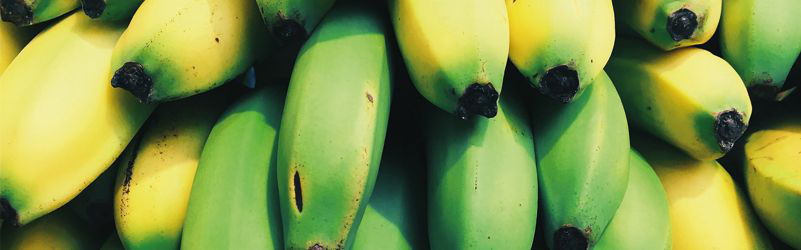

In [31]:
'''
Aquí se abre la imagen
imagen = Image.open('aquí toma la imagen introducida en la app')
imagen
'''
direc_img = '../public/clasificados/img01.jpg'
image = Image.open(direc_img)
image

In [33]:
'''
Aquí realiza la clasificación de la imagen
prediction('aquí toma la imagen introducida en la app', model)
'''
prediction(direc_img, model)

El plátano está: verde
Con una seguridad de:  99.20511841773987 %


0